# ***Binary Classification Problem***

### ***Data Preparation***

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("heart_disease_binary.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [7]:
df.isna().sum()
df.isna().sum().sum()

6

In [8]:
df = df.dropna()

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=43, stratify=y
)

### ***Model 1: KNN***

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [10]:
k_values = [3, 4, 5, 6, 7, 8, 9, 10]
cv_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv = 5, # we are using 5-folds
        scoring="accuracy"
    )
    cv_scores.append(scores.mean())

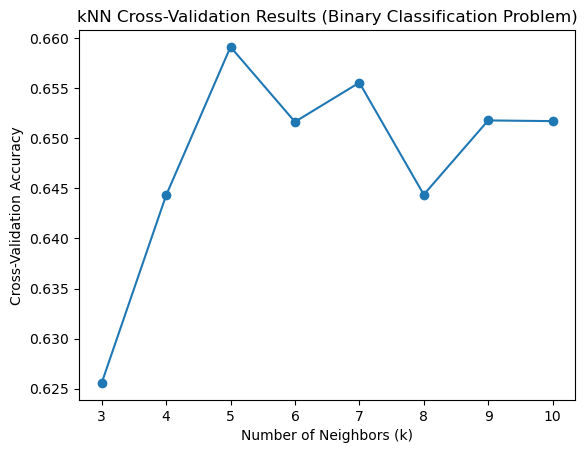

In [11]:
import matplotlib.pyplot as plt

plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("kNN Cross-Validation Results (Binary Classification Problem)")
plt.show()

we could see that the k value that has the best accuracy is k = 5.

In [12]:
best_k = k_values[np.argmax(cv_scores)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)

best_knn.fit(X_train, y_train)

5

In [37]:
from sklearn.metrics import accuracy_score
import time

start_train = time.time()
best_knn.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
y_pred = best_knn.predict(X_test)
end_pred = time.time()

print("Training time (s):", end_train - start_train)
print("Prediction time (s):", end_pred - start_pred)

acc = accuracy_score(y_test, y_pred)

print("Best k value:", best_k)
print("Test (Validation set) accuracy of the KNN model with k =", best_k, ":", acc)


Training time (s): 0.012694120407104492
Prediction time (s): 0.011677026748657227
Best k value: 5
Test (Validation set) accuracy of the KNN model with k = 5 : 0.6


### ***Model 2: ANN***

In [23]:
hidden_sizes = [5, 10, 20, 30, 50]

For the artificial neural network, we fixed the architecture to a single hidden layer and tuned the number of neurons in that layer using 5-fold cross-validation.

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

cv_scores_ann = []

for h in hidden_sizes:
    ann_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPClassifier(
            hidden_layer_sizes=(h,),
            max_iter=1000,
            random_state=42
        ))
    ])
    
    scores = cross_val_score(
        ann_pipeline,
        X_train,
        y_train,
        cv=5,  # we are using 5-folds
        scoring="accuracy"
    )
    cv_scores_ann.append(scores.mean())
    print(f"hidden_layer_sizes=({h},), CV accuracy={scores.mean():.4f}")

hidden_layer_sizes=(5,), CV accuracy=0.8243


/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden_layer_sizes=(10,), CV accuracy=0.8243


/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

hidden_layer_sizes=(20,), CV accuracy=0.7869


/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

hidden_layer_sizes=(30,), CV accuracy=0.8092


/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden_layer_sizes=(50,), CV accuracy=0.7980


/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


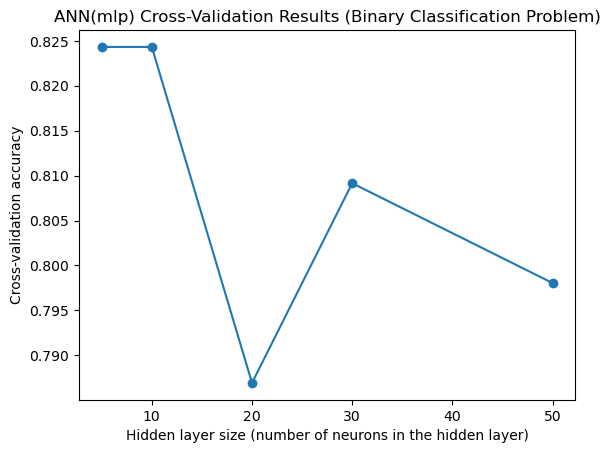

In [25]:
plt.plot(hidden_sizes, cv_scores_ann, marker='o')
plt.xlabel("Hidden layer size (number of neurons in the hidden layer)")
plt.ylabel("Cross-validation accuracy")
plt.title("ANN(mlp) Cross-Validation Results (Binary Classification Problem)")
plt.show()

based on the plot, we could see that the model with highest accuracy is with hidden layer size of 5 or 10. So we continue retrain our model with hidden size = 5.

In [26]:
best_h = hidden_sizes[np.argmax(cv_scores_ann)]
print("Best hidden size:", best_h)

best_ann = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(best_h,),
        max_iter=1000,
        random_state=42
    ))
])
best_h

Best hidden size: 5


5

In [36]:
start_train = time.time()
best_ann.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
y_pred = best_ann.predict(X_test)
end_pred = time.time()

print("Training time (s):", end_train - start_train)
print("Prediction time (s):", end_pred - start_pred)

acc = accuracy_score(y_test, y_pred)

print("Best hideen layer size:", best_h)
print("Test (Validation set) accuracy of the ANN model with hideen layer size =", best_h, ":", acc)


Training time (s): 0.3738420009613037
Prediction time (s): 0.0019137859344482422
Best hideen layer size: 5
Test (Validation set) accuracy of the ANN model with hideen layer size = 5 : 0.7333333333333333


/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### ***Model 3: Decision Tree***

In [29]:
depth_values = [2, 3, 4, 5, 6]

In [30]:
from sklearn.tree import DecisionTreeClassifier
cv_scores_dt = []

for d in depth_values:
    dt = DecisionTreeClassifier(
        max_depth=d,
        random_state=43
    )
    
    scores = cross_val_score(
        dt,
        X_train,
        y_train,
        cv=5, # again, we are still using 5-folds
        scoring="accuracy"
    )
    
    cv_scores_dt.append(scores.mean())
    print(f"max_depth={d}, CV accuracy={scores.mean():.4f}")

max_depth=2, CV accuracy=0.7567
max_depth=3, CV accuracy=0.7530
max_depth=4, CV accuracy=0.7567
max_depth=5, CV accuracy=0.7567
max_depth=6, CV accuracy=0.7604


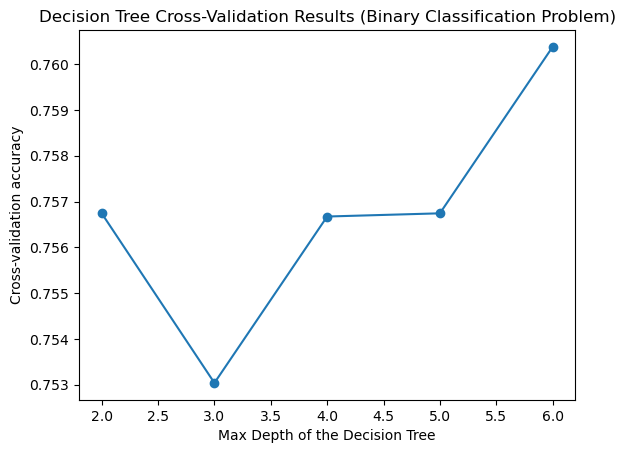

In [31]:
plt.plot(depth_values, cv_scores_dt, marker='o')
plt.xlabel("Max Depth of the Decision Tree")
plt.ylabel("Cross-validation accuracy")
plt.title("Decision Tree Cross-Validation Results (Binary Classification Problem)")
plt.show()

from the plot, we could see the decision tree with a depth of 6 achieves the highest cross validation accuracy.

In [33]:
best_depth = depth_values[np.argmax(cv_scores_dt)]
print("Best max_depth:", best_depth)

best_dt = DecisionTreeClassifier(
    max_depth=best_depth,
    random_state=43
)
best_depth

Best max_depth: 6


6

In [35]:
start_train = time.time()
best_dt.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
y_pred = best_dt.predict(X_test)
end_pred = time.time()

print("Training time (s):", end_train - start_train)
print("Prediction time (s):", end_pred - start_pred)

acc = accuracy_score(y_test, y_pred)

print("Best k value:", best_depth)
print("Test (Validation set) accuracy of the decision tree with a depth =", best_depth, ":", acc)


Training time (s): 0.003901958465576172
Prediction time (s): 0.0015087127685546875
Best k value: 6
Test (Validation set) accuracy of the decision tree with a depth = 6 : 0.6


### ***Model 4: Decision Tree***

In [38]:
n_estimators_list = [50, 100, 150, 200, 300]

In [39]:
from sklearn.ensemble import RandomForestClassifier
cv_scores_rf = []

for n in n_estimators_list:
    rf = RandomForestClassifier(
        n_estimators=n,
        random_state=43,
    )
    
    scores = cross_val_score(
        rf,
        X_train,
        y_train,
        cv=5,
        scoring="accuracy"
    )
    
    cv_scores_rf.append(scores.mean())
    print(f"n_estimators={n}, CV accuracy={scores.mean():.4f}")


n_estimators=50, CV accuracy=0.8354
n_estimators=100, CV accuracy=0.8318
n_estimators=150, CV accuracy=0.8317
n_estimators=200, CV accuracy=0.8280
n_estimators=300, CV accuracy=0.8280


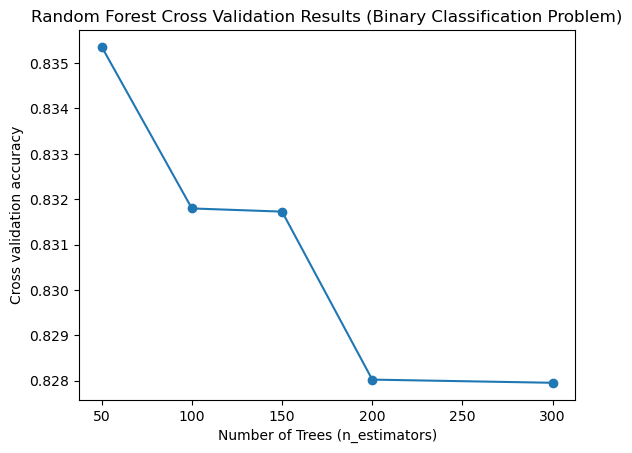

In [40]:
plt.plot(n_estimators_list, cv_scores_rf, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Cross validation accuracy")
plt.title("Random Forest Cross Validation Results (Binary Classification Problem)")
plt.show()

we see the 50 trees forest receives the highest cross validation accuracy.

In [41]:
best_n = n_estimators_list[np.argmax(cv_scores_rf)]

best_rf = RandomForestClassifier(
    n_estimators=best_n,
    random_state=43,
)

best_n

50

In [42]:
start_train = time.time()
best_rf.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
y_pred = best_rf.predict(X_test)
end_pred = time.time()

print("Training time (s):", end_train - start_train)
print("Prediction time (s):", end_pred - start_pred)

acc = accuracy_score(y_test, y_pred)

print("Best k value:", best_n)
print("Test (Validation set) accuracy of the random forest with number of decision trees inside =", best_n, ":", acc)


Training time (s): 0.16809511184692383
Prediction time (s): 0.004312992095947266
Best k value: 50
Test (Validation set) accuracy of the random forest with number of decision trees inside = 50 : 0.7
